In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [3]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [15]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [22]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]][:,[0,1]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]][:,[0,1]]
iris_y_test  = iris_y[indices[-10:]]

In [23]:
logistic = LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
logistic.predict(iris_X_train)

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2,
       1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1,
       0, 2])

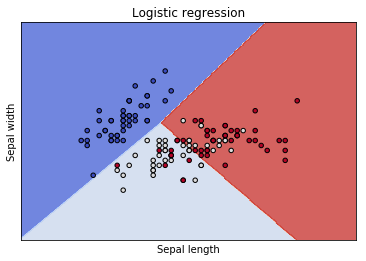

In [26]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
# X = iris.data[:, :2]
# y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
X0 = iris_X_train[:,0]
X1 = iris_X_train[:,1]
xx, yy = make_meshgrid(X0, X1)

clf = logistic

plot_contours(clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.title('Logistic regression')

plt.show()